In [18]:
import torch
from PIL import Image
import numpy as np
import torch.nn as nn

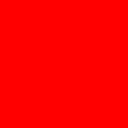

In [2]:
img_array = np.zeros((128,128,3), dtype=np.uint8)
img_array[:,:,0] = 255
img = Image.fromarray(img_array)
img.show()

In [3]:
image_array = np.array(img)
print(image_array.shape)
print(image_array.dtype)

(128, 128, 3)
uint8


In [4]:
image_array = image_array / 255
image_array = image_array.transpose(2,0,1).astype(np.float32)
print(image_array.shape , image_array.dtype, image_array.min(), image_array.max())

(3, 128, 128) float32 0.0 1.0


In [6]:
image_tensor = torch.from_numpy(image_array).unsqueeze(0)

In [45]:
def image_to_tensor(image: Image.Image) -> torch.Tensor:
    image_array = np.array(image)
    image_array = image_array / 255
    image_array = image_array.transpose(2,0,1).astype(np.float32)
    image_tensor = torch.from_numpy(image_array).unsqueeze(0)
    return image_tensor

def tensor_to_image(tensor: torch.Tensor) -> Image.Image:
    image_array = tensor.squeeze().numpy()
    image_array = image_array.transpose(1,2,0)
    image_array = image_array * 255
    image_array = image_array.astype(np.uint8)
    image = Image.fromarray(image_array)
    return image

In [46]:
color = tuple[int , int , int]

def create_empty_image(resolution: int, / , *, color: color = (0,0,0)) -> Image.Image:
    return Image.new("RGB", (resolution, resolution), color=color)

In [94]:
init_image = create_empty_image(128, color=(255,0,0))
init_tensor = image_to_tensor(init_image)
target_image = create_empty_image(128, color=(0,255,0))
target_tensor = image_to_tensor(target_image)


In [103]:
conv = torch.nn.Conv2d(3, 3, kernel_size=3,padding=1)
lr = 1e-5
num_steps = 10000


for step in range(num_steps):
    y = conv(init_tensor)
    loss = (y-target_tensor).norm()
    loss.backward()

    with torch.no_grad():
        for param in conv.parameters():
            param -= lr * param.grad
    print(f"step {step} : loss {loss.item()}")

step 0 : loss 156.7570343017578
step 1 : loss 155.1446075439453
step 2 : loss 151.92364501953125
step 3 : loss 147.10533142089844
step 4 : loss 140.67677307128906
step 5 : loss 132.64967346191406
step 6 : loss 123.01382446289062
step 7 : loss 111.7783432006836
step 8 : loss 98.9441909790039
step 9 : loss 84.53124237060547
step 10 : loss 68.54864501953125
step 11 : loss 51.05610656738281
step 12 : loss 32.22509765625
step 13 : loss 13.372517585754395
step 14 : loss 14.637189865112305
step 15 : loss 33.706443786621094
step 16 : loss 52.4954948425293
step 17 : loss 69.91900634765625
step 18 : loss 85.82676696777344
step 19 : loss 100.16526794433594
step 20 : loss 112.9154281616211
step 21 : loss 124.07318878173828
step 22 : loss 133.62364196777344
step 23 : loss 141.5727081298828
step 24 : loss 147.92198181152344
step 25 : loss 152.6630401611328
step 26 : loss 155.80160522460938
step 27 : loss 157.32106018066406
step 28 : loss 157.24000549316406
step 29 : loss 155.55967712402344
step 30 :

step 285 : loss 132.48297119140625
step 286 : loss 122.82725524902344
step 287 : loss 111.5694580078125
step 288 : loss 98.69185638427734
step 289 : loss 84.22268676757812
step 290 : loss 68.14466094970703
step 291 : loss 50.48181915283203
step 292 : loss 31.27254295349121
step 293 : loss 10.914709091186523
step 294 : loss 13.028206825256348
step 295 : loss 33.477203369140625
step 296 : loss 52.65767288208008
step 297 : loss 70.29098510742188
step 298 : loss 86.32990264892578
step 299 : loss 100.77201080322266
step 300 : loss 113.60269165039062
step 301 : loss 124.82501220703125
step 302 : loss 134.43511962890625
step 303 : loss 142.4503631591797
step 304 : loss 148.8340301513672
step 305 : loss 153.62770080566406
step 306 : loss 156.79550170898438
step 307 : loss 158.3571319580078
step 308 : loss 158.30770874023438
step 309 : loss 156.64614868164062
step 310 : loss 153.37847900390625
step 311 : loss 148.48902893066406
step 312 : loss 142.0080108642578
step 313 : loss 133.8971099853515

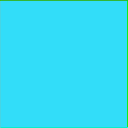

In [104]:
tensor_to_image(conv(init_tensor).data).show()

In [42]:
class Linear(nn.Module):

    def __init__(self , in_features: int = 1 , out_features: int = 1) -> None:
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = nn.Parameter(torch.Tensor(out_features , in_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))

    def forward(self , x: torch.Tensor) -> torch.Tensor:
        return x @ self.weight.t() + self.bias

linear = Linear(3,4)
x = torch.randn(1,3)
target = torch.randn(1,4)
y = linear(x)
loss = (torch.abs(y - target)**2).mean()
loss



tensor(nan, grad_fn=<MeanBackward0>)

In [43]:
loss.backward()

linear.weight.grad

tensor([[ 3.6556e+27, -1.6786e+28, -1.3367e+28],
        [        nan,         nan,         nan],
        [ 4.4730e+25, -2.0539e+26, -1.6356e+26],
        [-4.3974e+34,  2.0192e+35,  1.6080e+35]])

In [107]:
class ResBlock(nn.Module):

    def __init__(self , in_channels: int = 1 , out_channels: int = 1) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels , out_channels , kernel_size=3 , padding=1)
        self.activation = nn.SiLU()
        self.conv2 = nn.Conv2d(out_channels , out_channels , kernel_size=3 , padding=1)


    def forward(self , x: torch.Tensor) -> torch.Tensor:
        y = self.conv1(x)
        y = self.activation(y)
        y = self.conv2(y)
        return x + y

In [116]:
res = ResBlock(3,3)
lr = 1e-5
num_steps = 10000


for step in range(num_steps):
    y = res(init_tensor)
    loss = (y-target_tensor).norm()
    loss.backward()

    with torch.no_grad():
        for param in res.parameters():
            param -= lr * param.grad
    print(f"step {step} : loss {loss.item()}")

step 0 : loss 193.00965881347656
step 1 : loss 192.72665405273438
step 2 : loss 192.13548278808594
step 3 : loss 191.25634765625
step 4 : loss 190.08746337890625
step 5 : loss 188.61236572265625
step 6 : loss 186.8414764404297
step 7 : loss 184.75782775878906
step 8 : loss 182.361328125
step 9 : loss 179.6294708251953
step 10 : loss 176.56248474121094
step 11 : loss 173.13101196289062
step 12 : loss 169.30838012695312
step 13 : loss 165.0731964111328
step 14 : loss 160.3734893798828
step 15 : loss 155.1582489013672
step 16 : loss 149.358642578125
step 17 : loss 142.8851776123047
step 18 : loss 135.64231872558594
step 19 : loss 127.48827362060547
step 20 : loss 118.26078033447266
step 21 : loss 107.769775390625
step 22 : loss 95.81153869628906
step 23 : loss 82.19718170166016
step 24 : loss 66.89562225341797
step 25 : loss 50.5009880065918
step 26 : loss 36.207454681396484
step 27 : loss 34.14011001586914
step 28 : loss 48.42285919189453
step 29 : loss 68.47977447509766
step 30 : loss 8

step 208 : loss 39.86483383178711
step 209 : loss 38.67959976196289
step 210 : loss 37.287330627441406
step 211 : loss 35.692901611328125
step 212 : loss 33.901275634765625
step 213 : loss 31.919673919677734
step 214 : loss 29.7567138671875
step 215 : loss 27.424026489257812
step 216 : loss 24.941633224487305
step 217 : loss 22.331586837768555
step 218 : loss 19.637432098388672
step 219 : loss 16.925899505615234
step 220 : loss 14.321911811828613
step 221 : loss 12.058295249938965
step 222 : loss 10.540809631347656
step 223 : loss 10.26623821258545
step 224 : loss 11.392807006835938
step 225 : loss 13.541783332824707
step 226 : loss 16.218503952026367
step 227 : loss 19.086400985717773
step 228 : loss 21.953245162963867
step 229 : loss 24.709367752075195
step 230 : loss 27.288267135620117
step 231 : loss 29.649198532104492
step 232 : loss 31.76569938659668
step 233 : loss 33.620635986328125
step 234 : loss 35.20718002319336
step 235 : loss 36.51784896850586
step 236 : loss 37.554779052

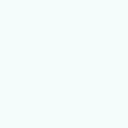

In [117]:
tensor_to_image(res(init_tensor).data).show()

## Encoder
# conv 3 -> 32

# channels
[32, 64, 128, 256]

# dowscales
[2, 2, 2, 2]

# latent dim
16


## Decoder
[256, 128, 64, 32]

# conv 32 -> 3


## Autoencoder


class Autoencoder(nn.Module):
    def __init__(self) -> None:
        super().__init__() # type: ignore
        self.encoder = Encoder()
        sel.decoder = Decoder()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.decoder(self.encoder(x))
    
# vous génerer des images et vous essayez de les reconstruire

In [118]:
class Encoder(nn.Module):

    def __init__(self, input_channels : int = 3) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels , 32 , kernel_size=3 , padding=1)
        self.conv2 = nn.Conv2d(32 , 64 , kernel_size=3 , padding=1)
        self.conv3 = nn.Conv2d(64 , 128 , kernel_size=3 , padding=1)
        self.conv4 = nn.Conv2d(128 , 256 , kernel_size=3 , padding=1)
        self.activation = nn.SiLU()
        self.downsample = nn.MaxPool2d(2)
    
    def forward(self , x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.activation(x)
        x = self.downsample(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.downsample(x)
        x = self.conv3(x)
        x = self.activation(x)
        x = self.downsample(x)
        x = self.conv4(x)
        x = self.activation(x)
        x = self.downsample(x)
        return x 

class Decoder(nn.Module):

    def __init__(self , output_channels: int = 3) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(256 , 128 , kernel_size=3 , padding=1)
        self.conv2 = nn.Conv2d(128 , 64 , kernel_size=3 , padding=1)
        self.conv3 = nn.Conv2d(64 , 32 , kernel_size=3 , padding=1)
        self.conv4 = nn.Conv2d(32 , output_channels , kernel_size=3 , padding=1)
        self.upsample = nn.Upsample(scale_factor=2 , mode="nearest")
        self.activation = nn.SiLU()
    
    def forward(self , x: torch.Tensor) -> torch.Tensor:
        x = self.upsample(x)
        x = self.conv1(x)
        x = self.activation(x)
        x = self.upsample(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.upsample(x)
        x = self.conv3(x)
        x = self.activation(x)
        x = self.upsample(x)
        x = self.conv4(x)
        x = self.activation(x)
        return x

class AutoEncoder(nn.Module):

    def __init__(self , input_channels: int = 3 , output_channels: int = 3) -> None:
        super().__init__()
        self.encoder = Encoder(input_channels)
        self.decoder = Decoder(output_channels)
    
    def forward(self , x: torch.Tensor) -> torch.Tensor:
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [119]:
autoencoder = AutoEncoder()
lr = 1e-5
num_steps = 100
optimizer = torch.optim.Adam(autoencoder.parameters() , lr=lr)

for step in range(num_steps):
    y = autoencoder(init_tensor)
    loss = (y-target_tensor).norm()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"step {step} : loss {loss.item()}")

AttributeError: module 'torch.nn' has no attribute 'Conv2'